First, import the neccessary packages for this project. From there define your dataset into a dataframe.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [103]:
df=pd.read_csv('kc_house_data.csv')
df.head()
df.shape

(21597, 21)

We can then begin our data scrubbing process. First evaluate the column names then evaluate the null values in each column

In [35]:
print(df.columns)
df.isna().sum()

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

The columns waterfront and yr_renovated have a signficant amount of null values to where further evaluation is needed. The low number of null values in the view column allow for us to simply delete rows that contain these null values. This will be done after first evaluating the other two columns. First let's look and see the unique values for waterfront.

In [37]:
df.waterfront.unique()

array([nan,  0.,  1.])

This seems to indicate that either the property is facing the waterfront, not facing, or there is a null value. To evaluate how one can designate the null values, the price of these properties with respect to the 3 waterfront values is analyzed using a boxplot.

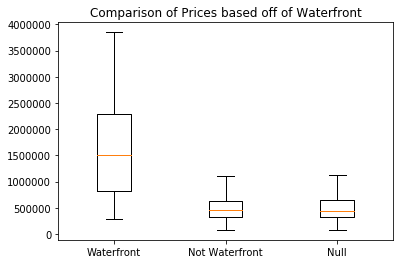

In [56]:
yes=df.price[df['waterfront']==1]
no=df.price[df['waterfront']==0]
maybe=df.price[df['waterfront'].isna()]
plt.boxplot([yes,no,maybe],labels=['Waterfront','Not Waterfront', 'Null'],showfliers=False)
plt.title('Comparison of Prices based off of Waterfront')
plt.show()

Waterfront seems to cause an increase in price but this would have to be further evaluated later. More importantly, it seems that when the waterfront value is null it most resembles when the property is not waterfront. Thus these NaN values can be replace with 0.

In [109]:
df.waterfront.fillna(0,inplace=True)
df.isna().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view             63
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

The focus then shifts to yr_renovated where we repeat the same process of evaluating how we can change the NaN values

In [62]:
df.yr_renovated.value_counts()


0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

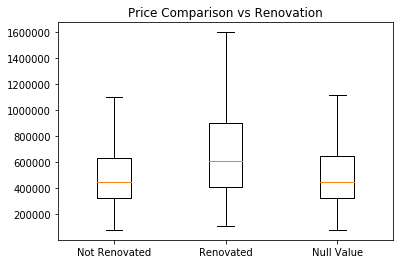

In [95]:
not_renovated=df.price[df['yr_renovated']==0]
renovated=df.price[(df['yr_renovated']!=0) &(df['yr_renovated'].notna())]
null_ren=df.price[df['yr_renovated'].isna()]
plt.boxplot([not_renovated,renovated,null_ren],labels=['Not Renovated','Renovated','Null Value'],showfliers=False)
plt.title('Price Comparison vs Renovation')
plt.show()

The same conclusions can be drawn in which all the null values are replaces with 0 as they seem to exhibit similar behavior.

In [110]:
df.yr_renovated.fillna(0,inplace=True)
df.isna().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view             63
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

The remaining 63 null values can be dropped. 

In [105]:
df.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [118]:
zero=df.price[df['view']==0]
one=df.price[df['view']==1]
two=df.price[df['view']==2]
three=df.price[df['view']==3]
four=df.price[df['view']==4]
null_view=df.price[df['view'].isna()
plt.boxplot([zero,one,two,three,four,null_view],labels=['0','1','2','3','4','Null'],showfliers=False)
plt.show()

SyntaxError: invalid syntax (<ipython-input-118-a578cd94a8be>, line 7)

1         538000.0
35        696000.0
95        905000.0
103      1090000.0
125      1450000.0
           ...    
19602     451000.0
20041     434900.0
20428     500012.0
20431     356999.0
20946     110000.0
Name: price, Length: 744, dtype: float64

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
